In [1]:
import os, os.path, re
from pprint import pprint
import pandas as pd
import seaborn as sns

9 10 19


<Axes: xlabel='n_tokens', ylabel='runtime_sec'>

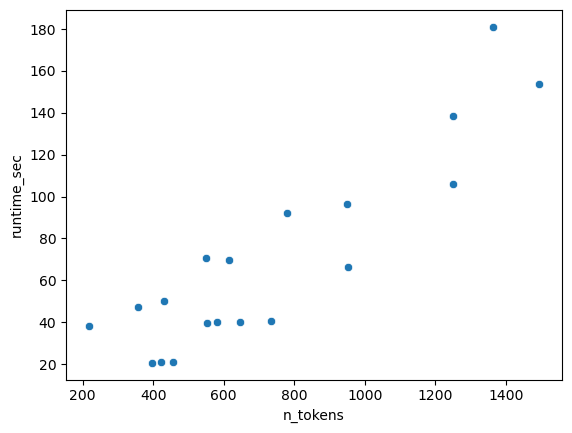

In [2]:
def parse_(file):
    with open(fp_, 'r') as handle:
        ll = handle.readlines()
    rr = [
        r'(\S+) (\S+) (\S+) (\S+) Calculating bucket size for input with (?P<n_tokens>[-+]?\d+) tokens.',
        r'Running model inference and extracting output structures for seeds \(4,\) took (?P<runtime_sec>[-+]?(\d+(\.\d*)?|\.\d+)([eE][-+]?\d+)?) seconds.',
        r'Done processing fold input (?P<done_processing>\S+).'
    ]
    d = dict()
    for l in ll:
        for r in rr:
            m = re.fullmatch(r, l.rstrip())
            if m:
                d.update(m.groupdict())
                if 'done_processing' in d.keys():
                    yield(d.copy())
                    d.clear()

fp_ = 'af3_bacteria/.snakemake-eu/logs/25-01-23/alphafold3_predictions/alphafold3_predictions:-21710718.txt'
df1_ = pd.DataFrame.from_records(parse_(fp_)).astype({'n_tokens': int, 'runtime_sec': float})
fp_ = 'af3_virus/.snakemake-eu/logs/25-01-23/alphafold3_predictions/alphafold3_predictions:-21710717.txt'
df2_ = pd.DataFrame.from_records(parse_(fp_)).astype({'n_tokens': int, 'runtime_sec': float})
df_ = pd.concat([df1_, df2_], axis=0).reset_index(drop=True)
print(len(df1_), len(df2_), len(df_))
sns.scatterplot(df_, x='n_tokens', y='runtime_sec')